# Nibabel Basics Notebook
### *Learning how to load and view MRI scans*

## Import Libraries
We need nibabel for MRI files and matplotlib for plotting.

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Upload an MRI File (.nii.gz)
Upload any NIfTI file.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving CT_AVM.nii.gz to CT_AVM.nii.gz


## Load MRI File
Nibabel loads the 3D MRI volume as a NumPy array.

In [5]:
file_path = list(uploaded.keys())[0]
mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (256, 242, 154)


## Visualize a Middle Slice
MRI is 3D. We view one slice at a time.

(np.float64(-0.5), np.float64(241.5), np.float64(255.5), np.float64(-0.5))

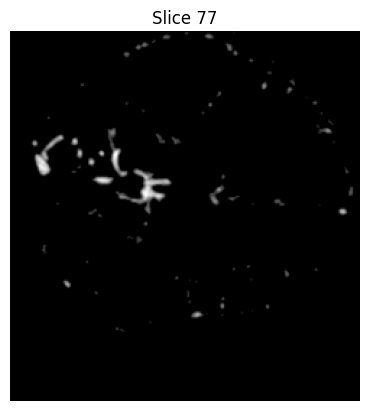

In [6]:
slice_index = mri.shape[2] // 2
plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')

## Extract All Slices
Convert 3D MRI into 2D slices.

In [7]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

154

## Normalize a Slice
Normalization improves contrast.

(np.float64(-0.5), np.float64(241.5), np.float64(255.5), np.float64(-0.5))

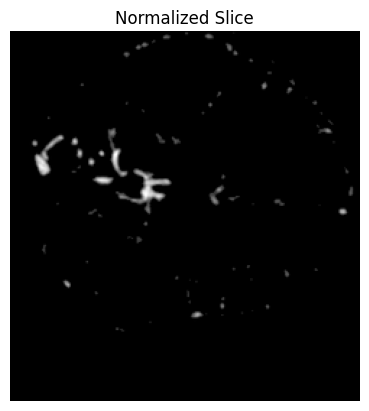

In [8]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

## Resize Slice (Used in ML Preprocessing)

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

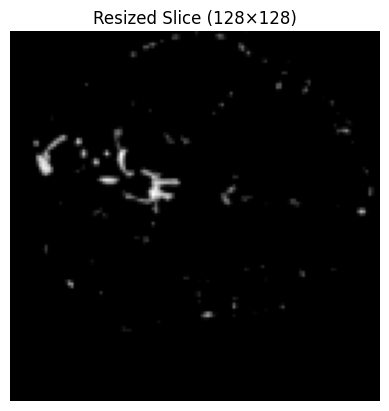

In [9]:
import tensorflow as tf
resized = tf.image.resize(norm_slice[..., None], (128, 128))
plt.imshow(resized.numpy().squeeze(), cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

## **Exercises**
1. Load **another** MRI file and visualize 5 slices.
2. Write a function `plot_slices(volume, indices)` to plot given slice numbers.
3. Create a function to normalize **all** slices and return the new array.
4. Resize all slices to 128×128 and count how many slices contain tumor pixels (if mask available).


Saving CT_Abdo.nii.gz to CT_Abdo.nii.gz
Second MRI Shape: (255, 178, 256)


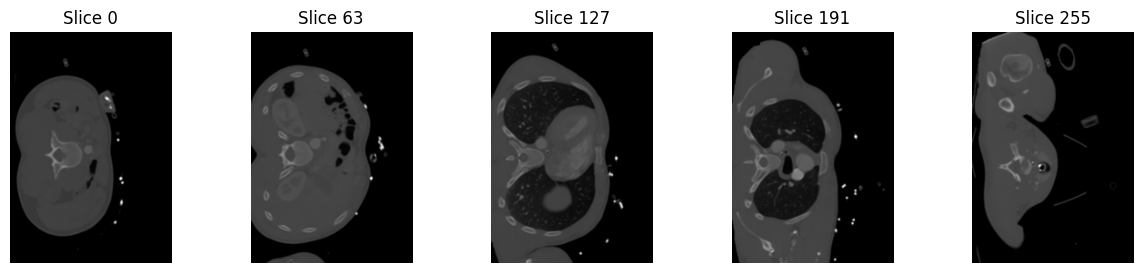

In [10]:
uploaded2 = files.upload()

file_path2 = list(uploaded2.keys())[0]
mri2 = nib.load(file_path2).get_fdata()
print('Second MRI Shape:', mri2.shape)

slice_indices = np.linspace(0, mri2.shape[2] - 1, 5, dtype=int)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(slice_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(mri2[:, :, idx], cmap='gray')
    plt.title(f'Slice {idx}')
    plt.axis('off')
plt.show()

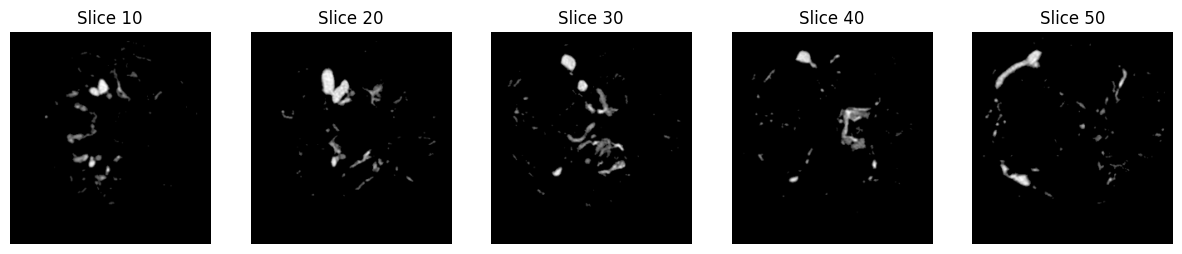

In [14]:
def plot_slices(volume, indices):
    plt.figure(figsize=(3 * len(indices), 3))
    for i, idx in enumerate(indices):
        plt.subplot(1, len(indices), i + 1)
        plt.imshow(volume[:, :, idx], cmap='gray')
        plt.title(f'Slice {idx}')
        plt.axis('off')
    plt.show()

plot_slices(mri, [10, 20, 30, 40, 50])

In [15]:
def normalize_volume(volume):
    v_min = np.min(volume)
    v_max = np.max(volume)
    normalized = (volume - v_min) / (v_max - v_min)
    return normalized

norm_mri = normalize_volume(mri)
print(norm_mri.min(), norm_mri.max())

0.0 1.0


In [16]:
def resize_volume(volume, size=(128, 128)):
    resized_slices = []
    for i in range(volume.shape[2]):
        slice_ = volume[:, :, i]
        slice_ = slice_[..., None]
        resized = tf.image.resize(slice_, size)
        resized_slices.append(resized.numpy().squeeze())
    return np.stack(resized_slices, axis=2)

resized_mri = resize_volume(norm_mri)
print(resized_mri.shape)

(128, 128, 154)


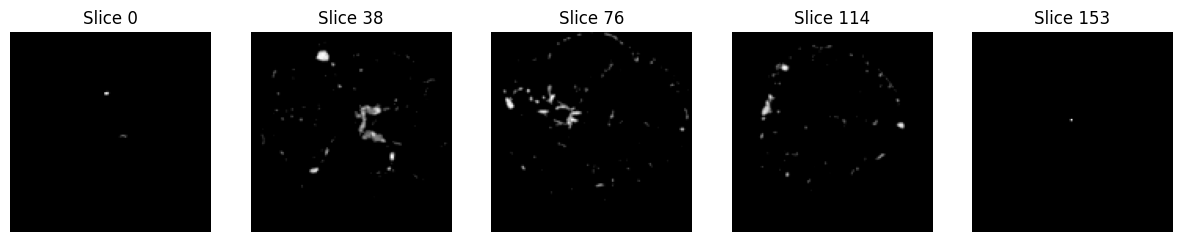

In [18]:
def plot_slices(volume, indices):
    plt.figure(figsize=(3 * len(indices), 3))
    for i, idx in enumerate(indices):
        plt.subplot(1, len(indices), i + 1)
        plt.imshow(volume[:, :, idx], cmap='gray')
        plt.title(f'Slice {idx}')
        plt.axis('off')
    plt.show()

slice_ids = np.linspace(0, resized_mri.shape[2] - 1, 5, dtype=int)
plot_slices(resized_mri, slice_ids)

In [19]:
def preprocess_mri(volume):
    volume = normalize_volume(volume)
    volume = resize_volume(volume)
    return volume

processed_mri = preprocess_mri(mri)
print(processed_mri.shape)

(128, 128, 154)
